# Support vector machine (Salary data)

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

# EDA

In [2]:
df=pd.read_csv('SalaryData_Train(1).csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [4]:
df.shape

(30161, 14)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

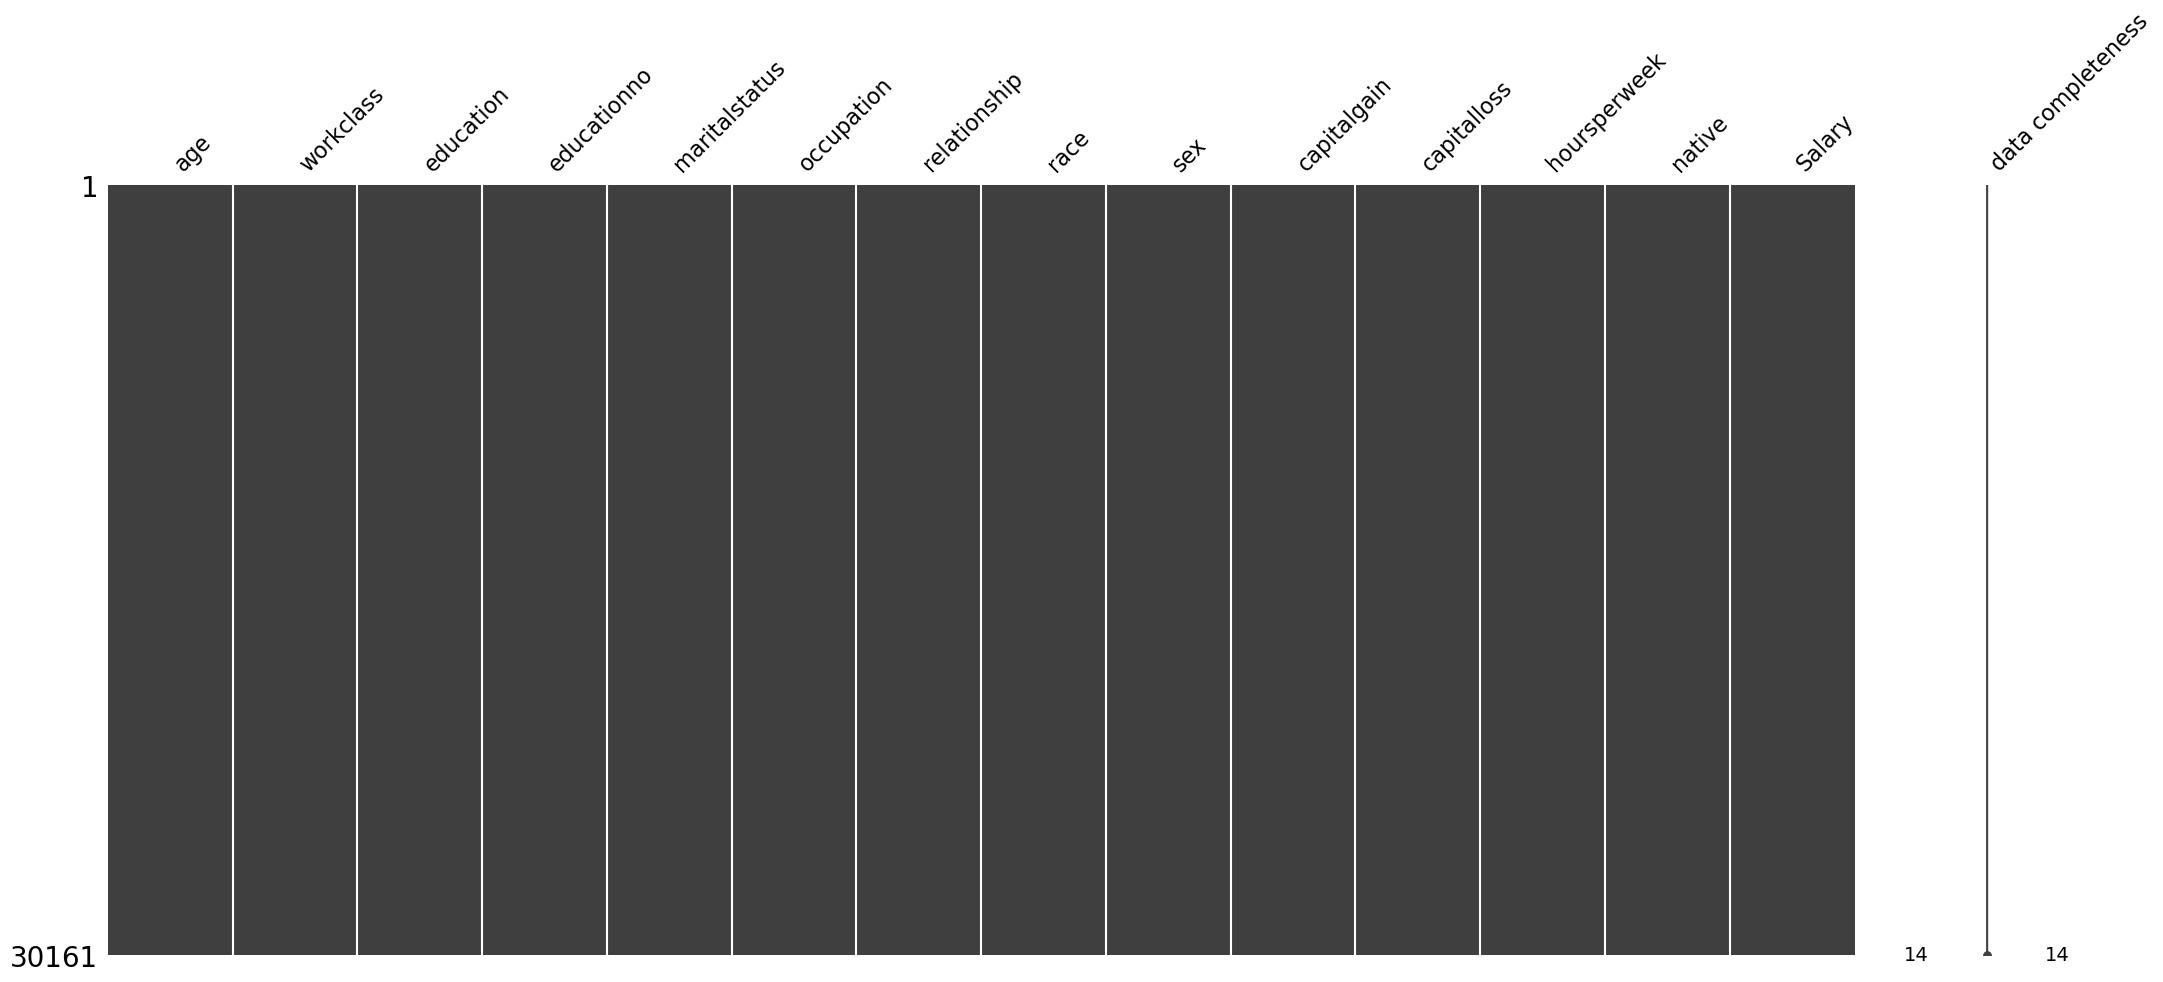

In [5]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [7]:
df['Salary']=LabelEncoder().fit_transform(df['Salary'])
df['sex']=LabelEncoder().fit_transform(df['sex'])
df['occupation']=LabelEncoder().fit_transform(df['occupation'])
df['education']=LabelEncoder().fit_transform(df['education'])
df['workclass']=LabelEncoder().fit_transform(df['workclass'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  int64 
 2   education      30161 non-null  int64 
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  int64 
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  int64 
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 3.2+ MB


In [9]:
#droping the objects from dataframe
df=df.drop(['maritalstatus','relationship','race','native'],axis=1)
df

,age,workclass,education,educationno,occupation,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,0,1,2174,0,40,0
1,50,4,9,13,3,1,0,0,13,0
2,38,2,11,9,5,1,0,0,40,0
3,53,2,1,7,5,1,0,0,40,0
4,28,2,9,13,9,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,12,0,0,0,38,0
30157,40,2,11,9,6,1,0,0,40,1
30158,58,2,11,9,0,0,0,0,40,0
30159,22,2,11,9,0,1,0,0,20,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
workclass,30161.0,2.199330,0.953940,0.0,2.0,2.0,2.0,6.0
education,30161.0,10.333610,3.812260,0.0,9.0,11.0,12.0,15.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
occupation,30161.0,5.959849,4.029633,0.0,2.0,6.0,9.0,13.0
sex,30161.0,0.675707,0.468118,0.0,0.0,1.0,1.0,1.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0
Salary,30161.0,0.248931,0.432401,0.0,0.0,0.0,0.0,1.0


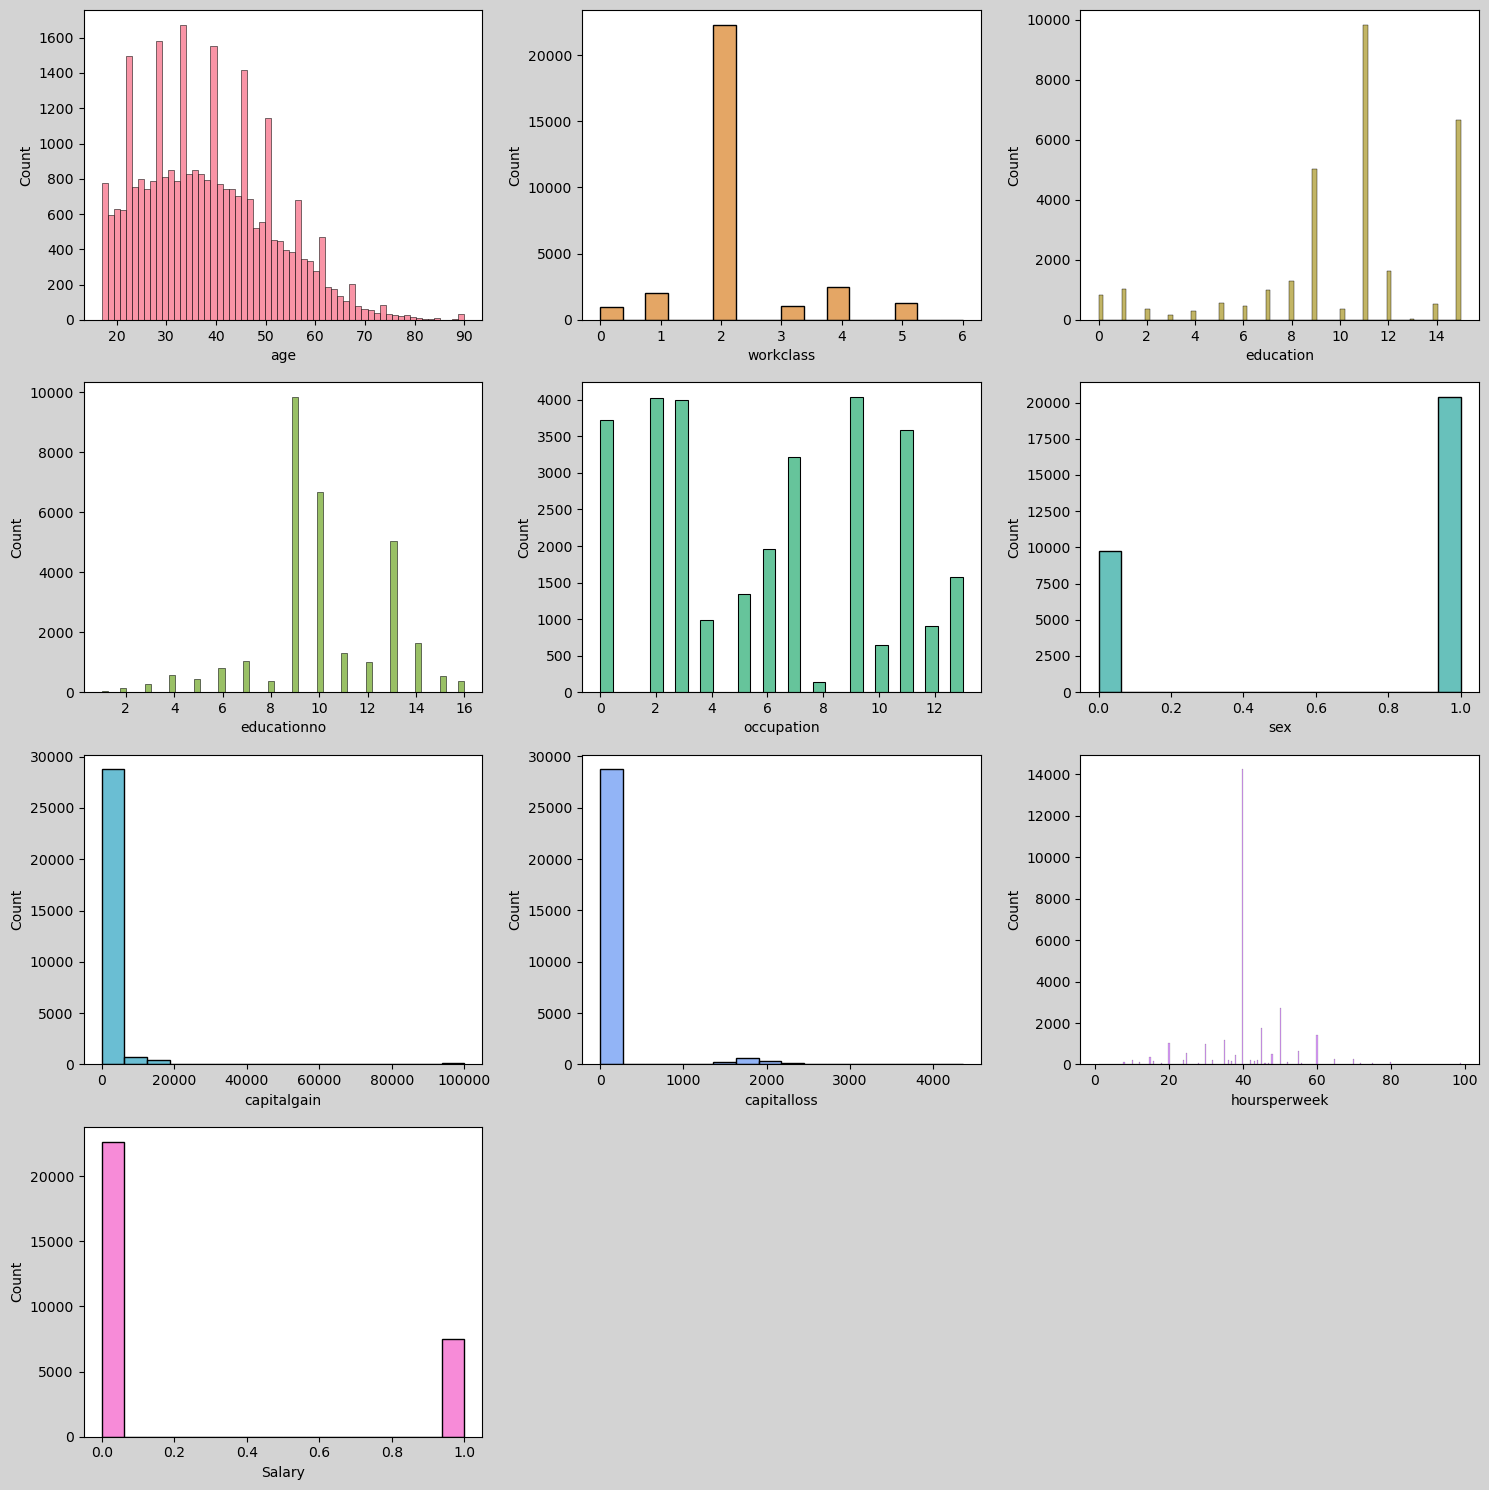

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

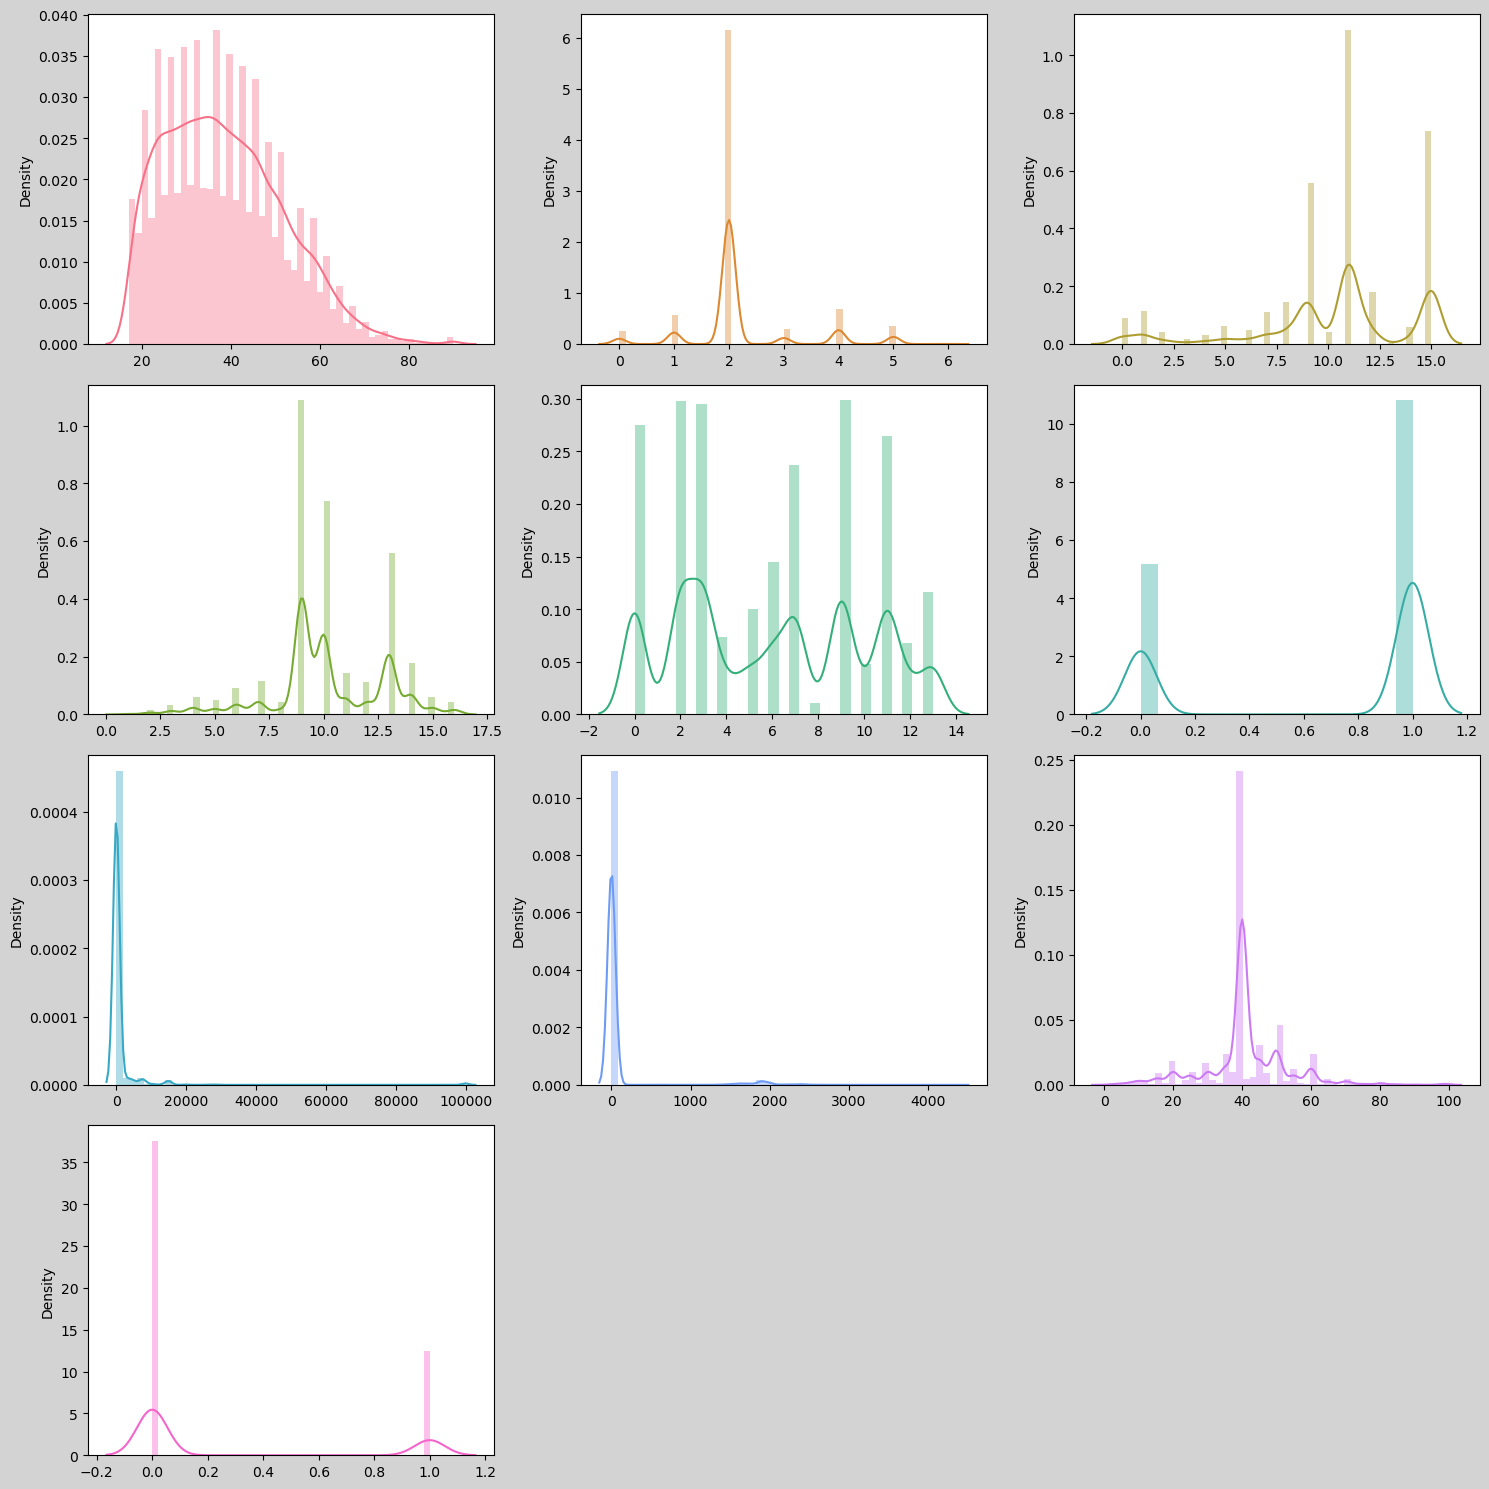

In [16]:
#performing univerent analysis
import warnings
warnings.filterwarnings('ignore')
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

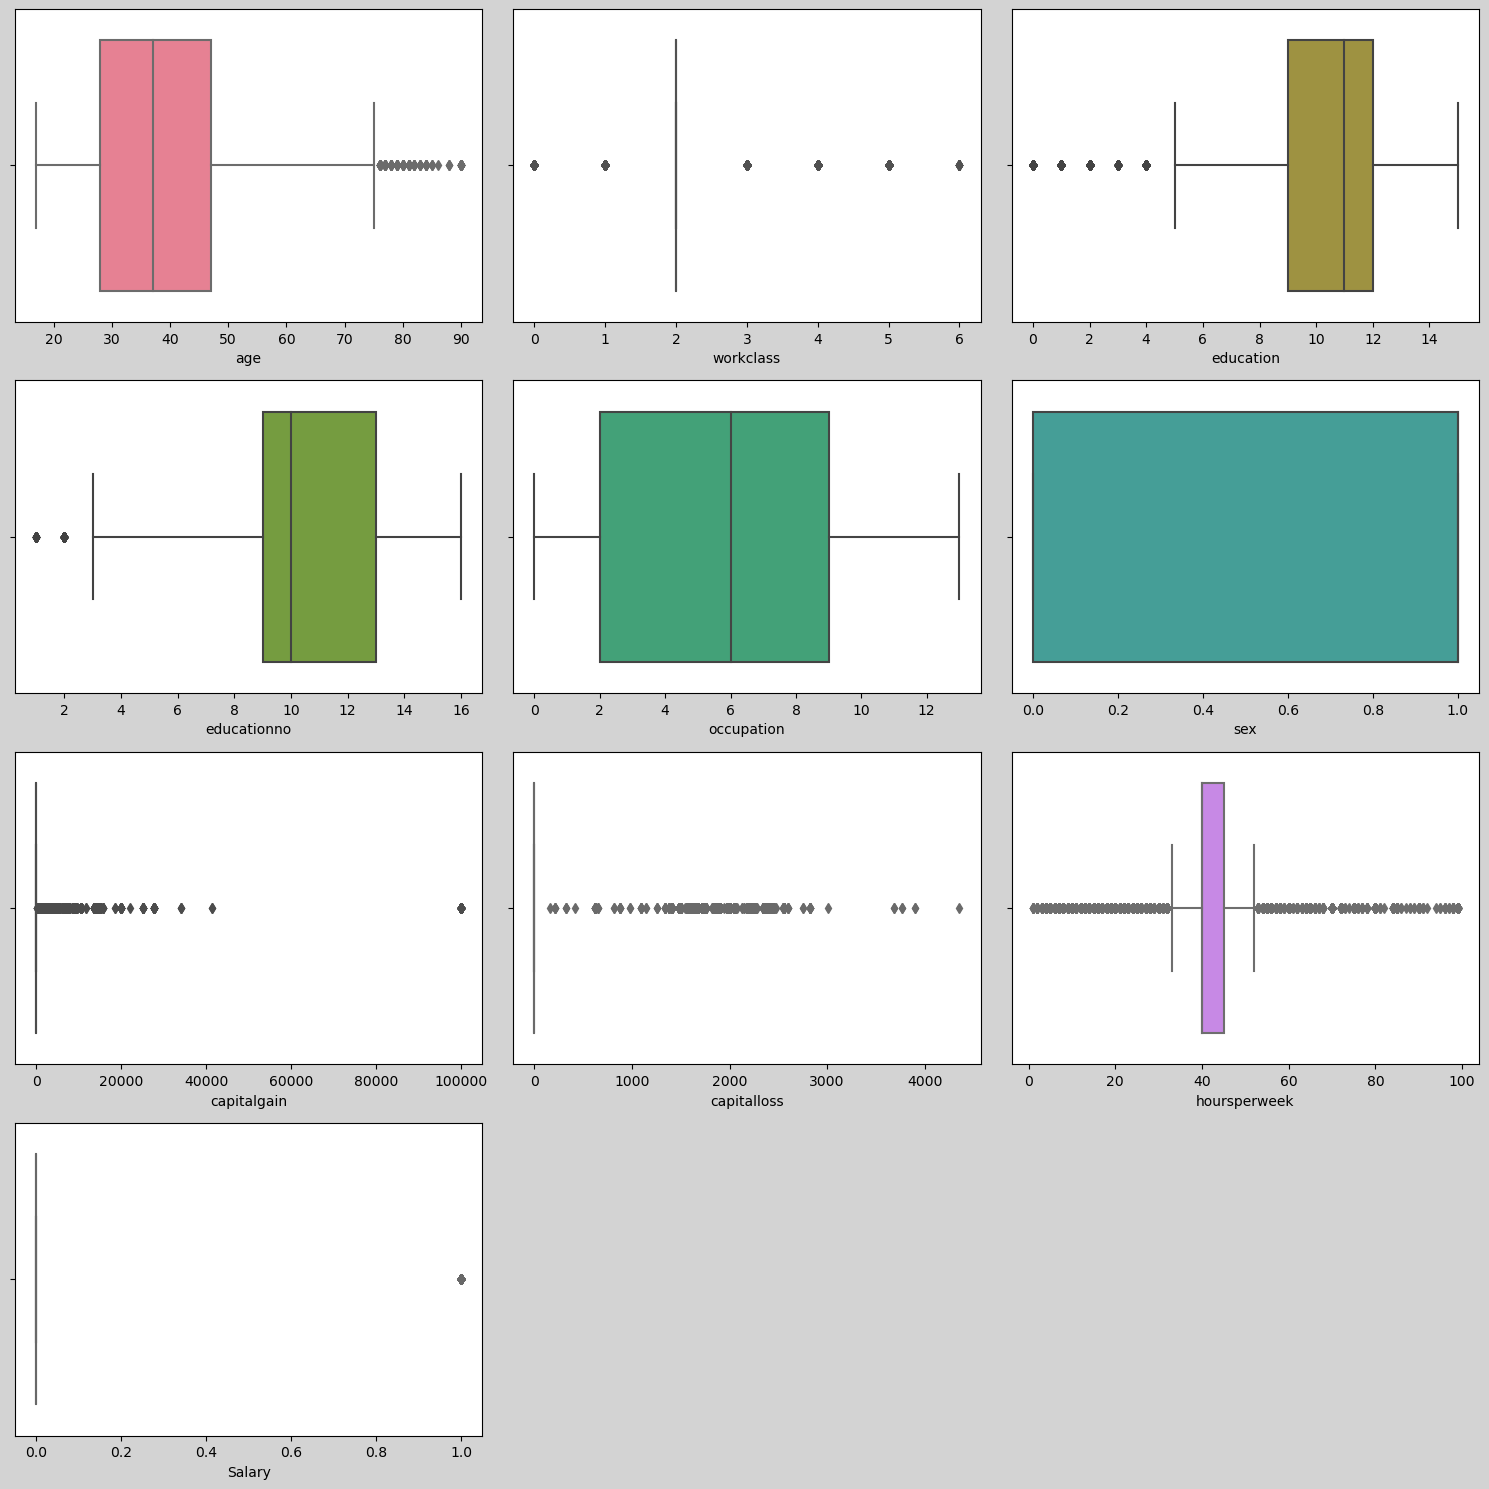

In [17]:
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

,age,workclass,education,educationno,occupation,sex,capitalgain,capitalloss,hoursperweek,Salary
age,1.000000,0.080537,-0.001091,0.043525,-0.005682,0.081972,0.080152,0.060278,0.101598,0.241991
workclass,0.080537,1.000000,0.017864,0.037833,0.015572,0.074966,0.035349,0.007244,0.050723,0.018040
education,-0.001091,0.017864,1.000000,0.345420,-0.038213,-0.027831,0.030582,0.014822,0.059892,0.079013
educationno,0.043525,0.037833,0.345420,1.000000,0.087717,0.006155,0.124416,0.079691,0.152522,0.335287
occupation,-0.005682,0.015572,-0.038213,0.087717,1.000000,0.062316,0.022162,0.014612,0.018365,0.051577
sex,0.081972,0.074966,-0.027831,0.006155,0.062316,1.000000,0.048809,0.047285,0.231272,0.216680
capitalgain,0.080152,0.035349,0.030582,0.124416,0.022162,0.048809,1.000000,-0.032218,0.080431,0.221195
capitalloss,0.060278,0.007244,0.014822,0.079691,0.014612,0.047285,-0.032218,1.000000,0.052454,0.150222
hoursperweek,0.101598,0.050723,0.059892,0.152522,0.018365,0.231272,0.080431,0.052454,1.000000,0.229480
Salary,0.241991,0.018040,0.079013,0.335287,0.051577,0.216680,0.221195,0.150222,0.229480,1.000000


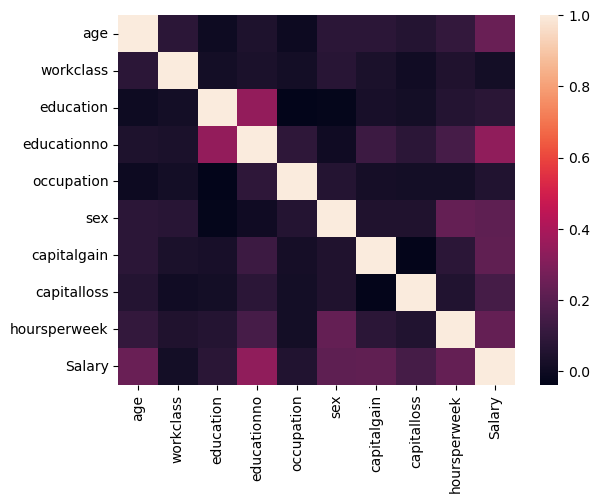

In [18]:
sns.heatmap(df.corr())
df.corr()

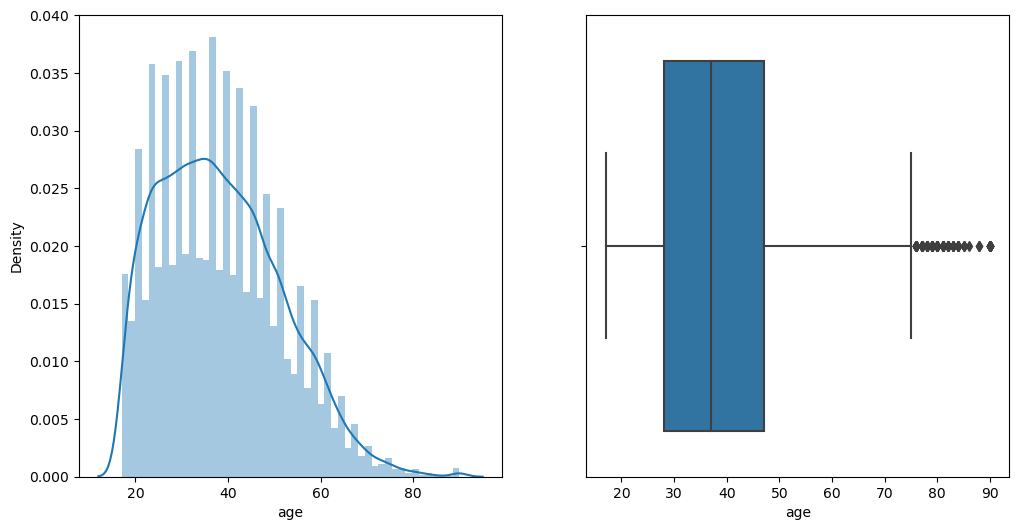

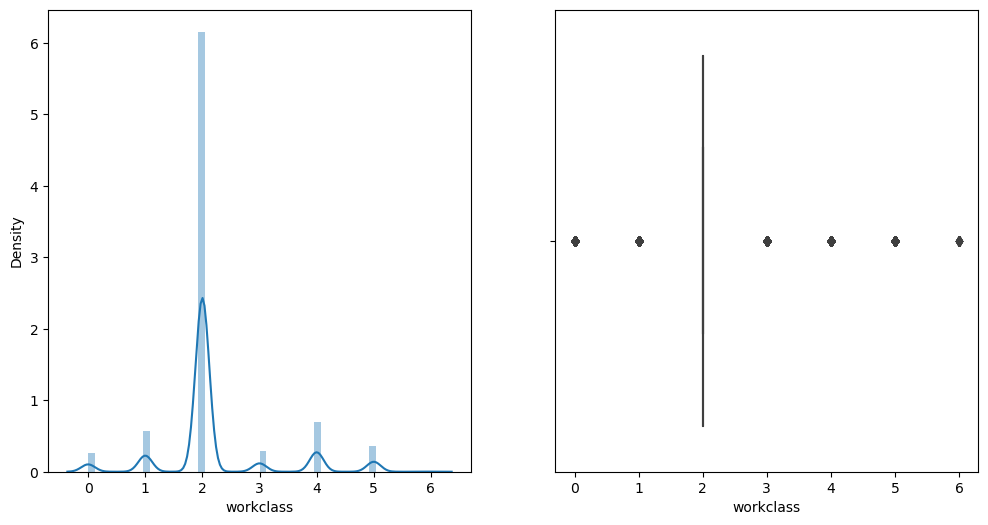

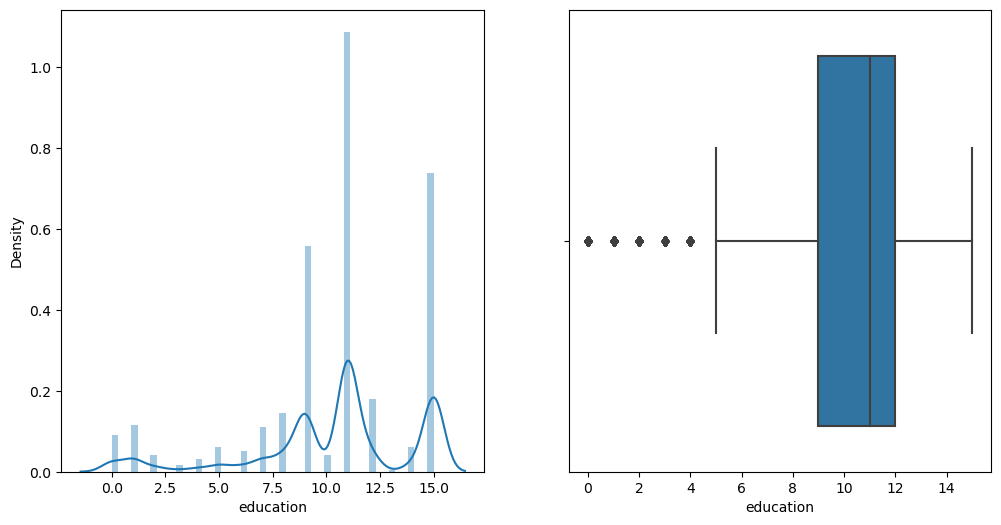

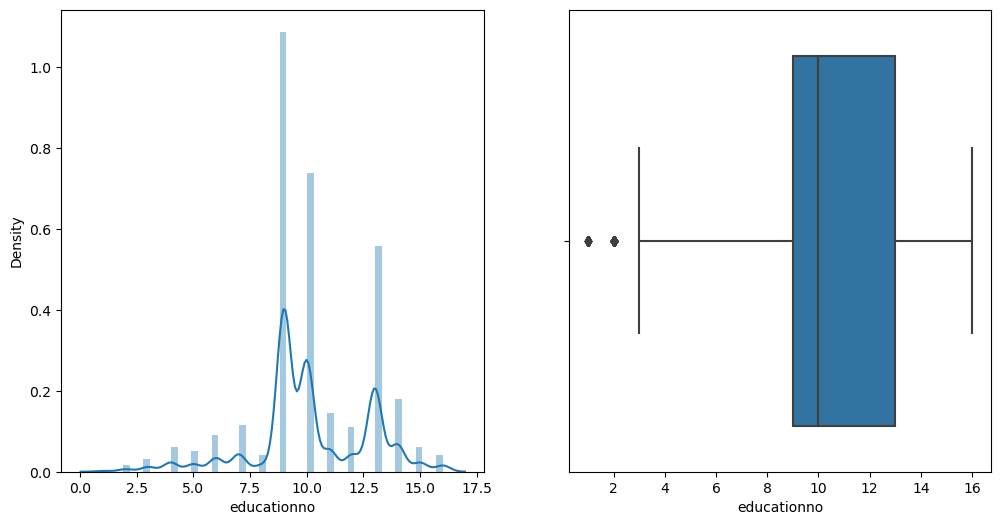

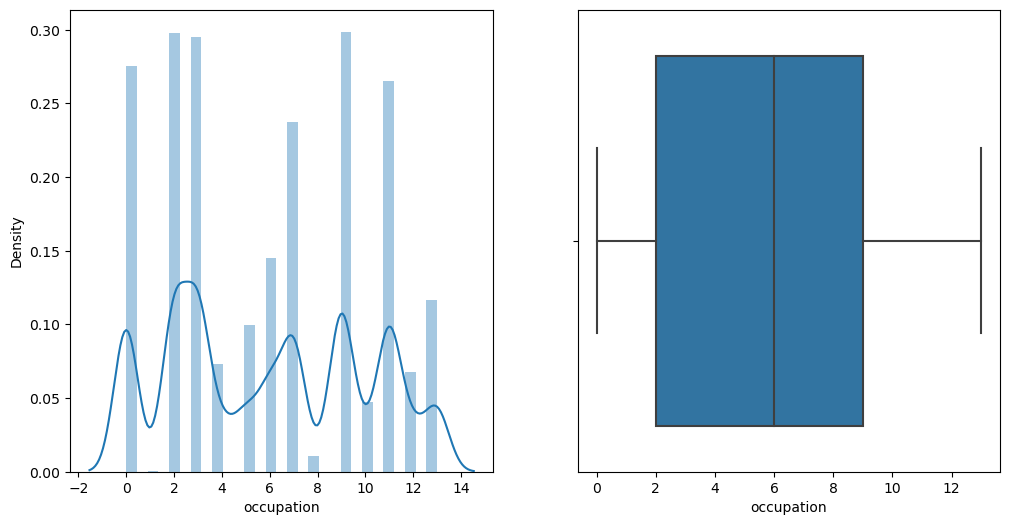

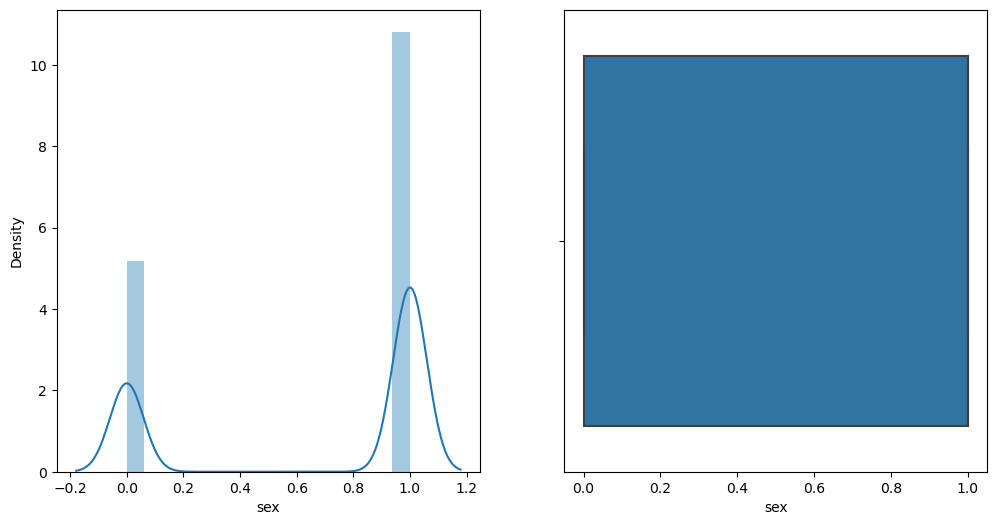

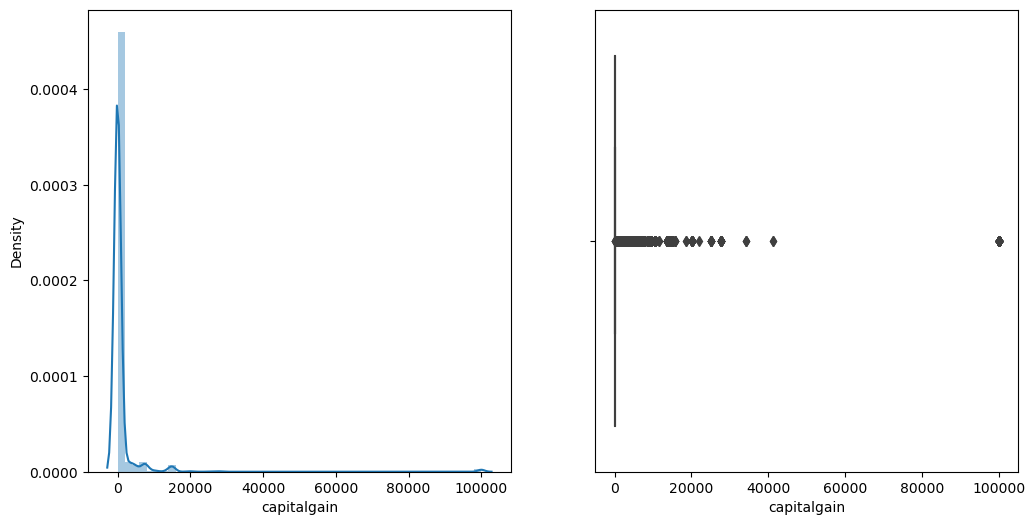

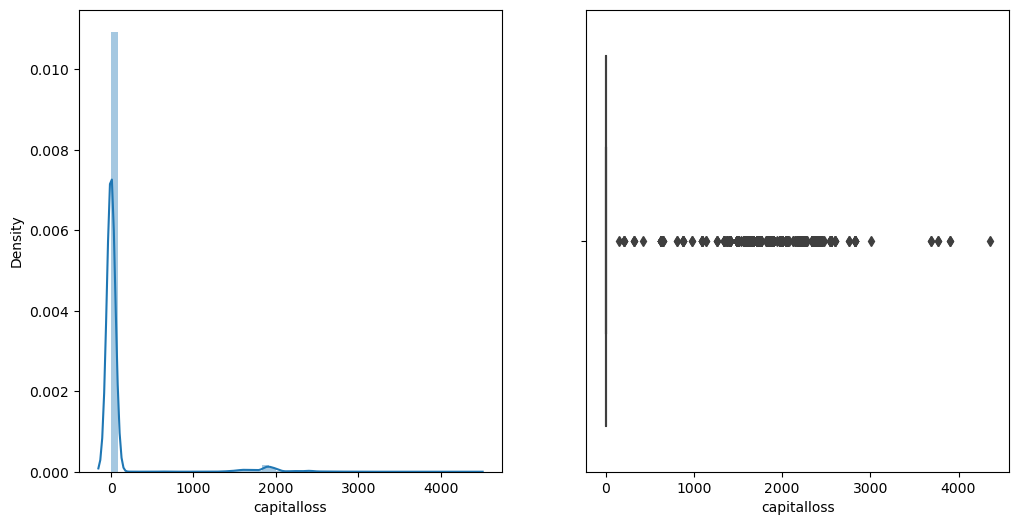

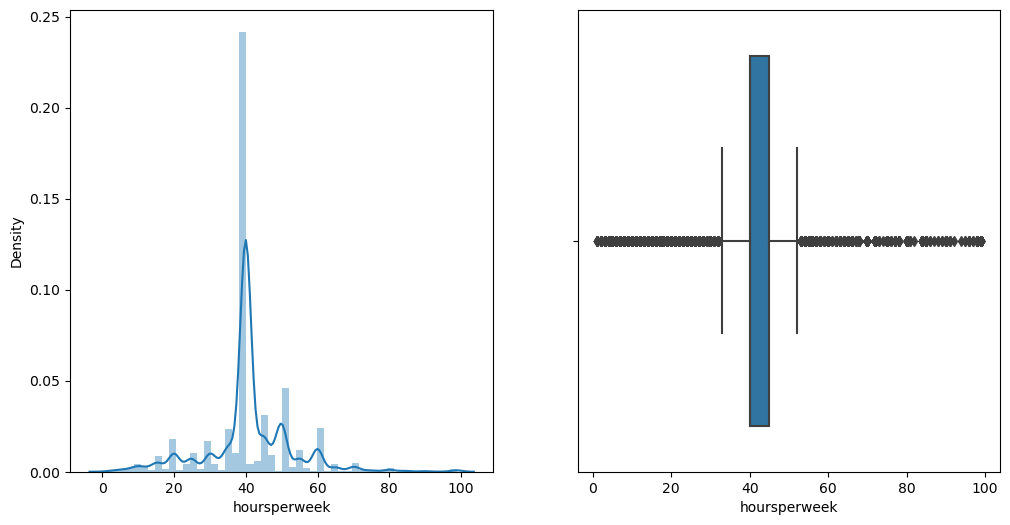

In [19]:
import warnings
warnings.filterwarnings('ignore')
for col in df.iloc[:,:-1].columns:
    plt.figure(figsize=(12,6))
    
    plt.subplot(121)
    sns.distplot(df[col],label='skewness:'+ str(np.round(df[col].skew(),2)))
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout

In [20]:
#ok lets treat the oulier i am using iqr method
def treatoutlier(df,cols):
    for col in cols:
        
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
    
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
    
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    

In [21]:
treatoutlier(df,df.iloc[:,:-1].columns)

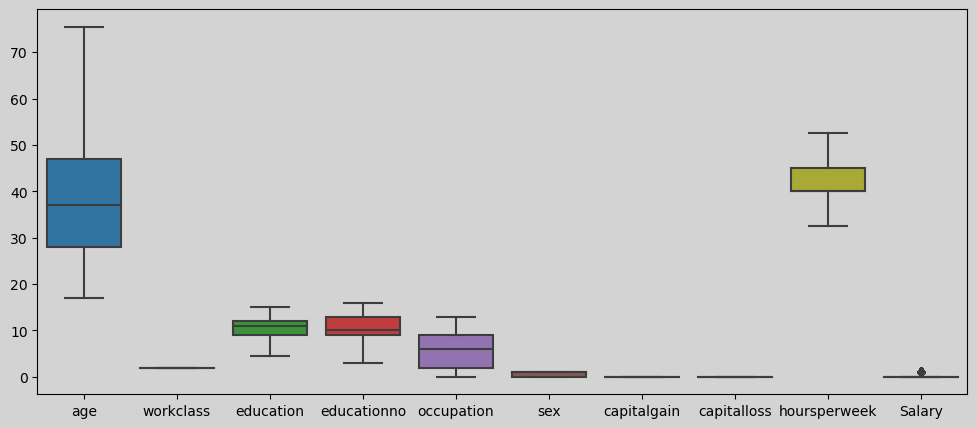

In [23]:
plt.figure(figsize=(12,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey') 
sns.boxplot(data=df);#see here i have treated the outliers by using iqr method

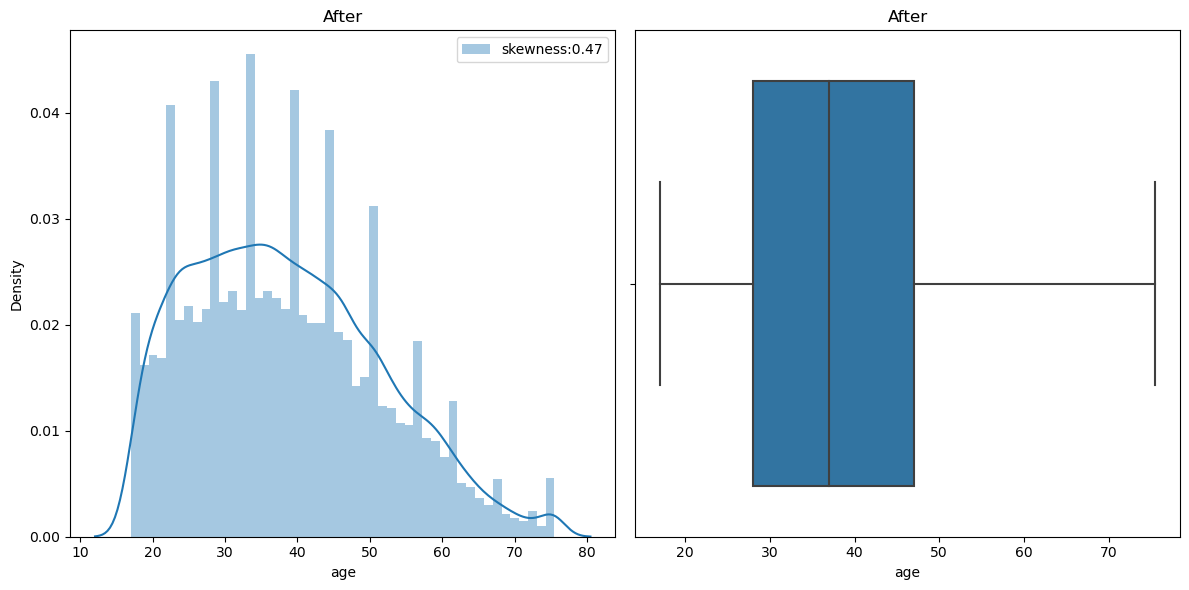

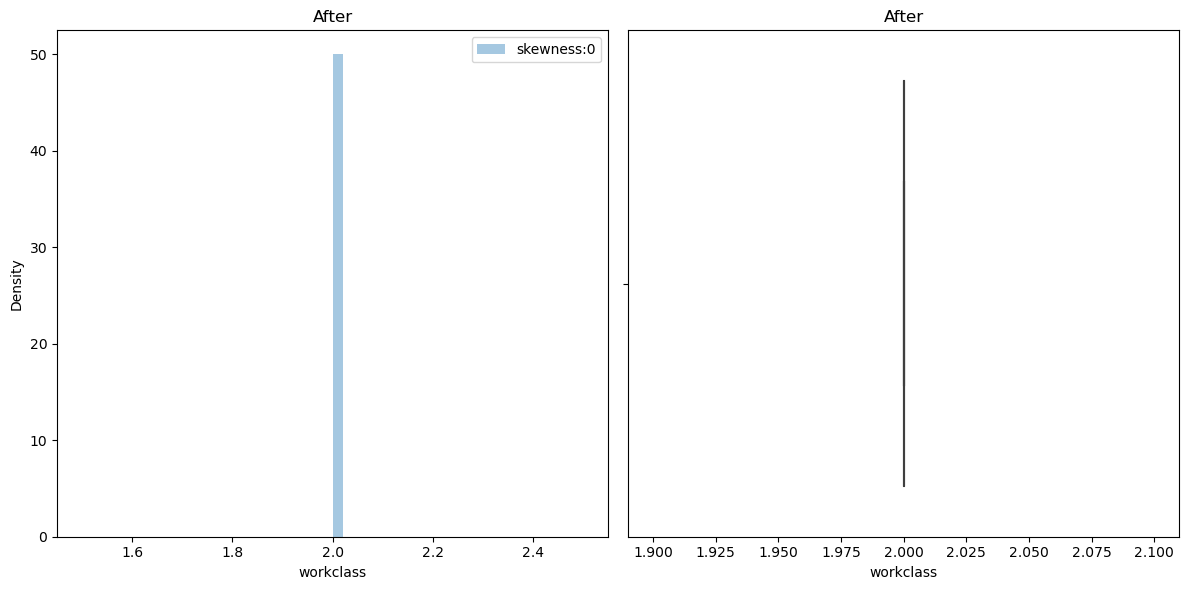

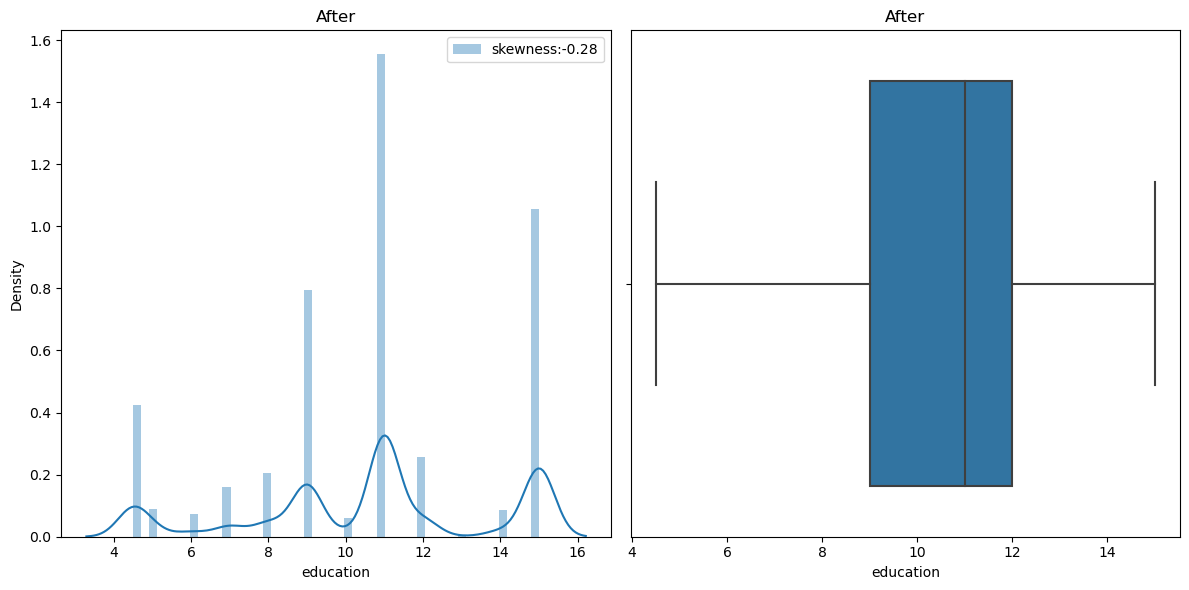

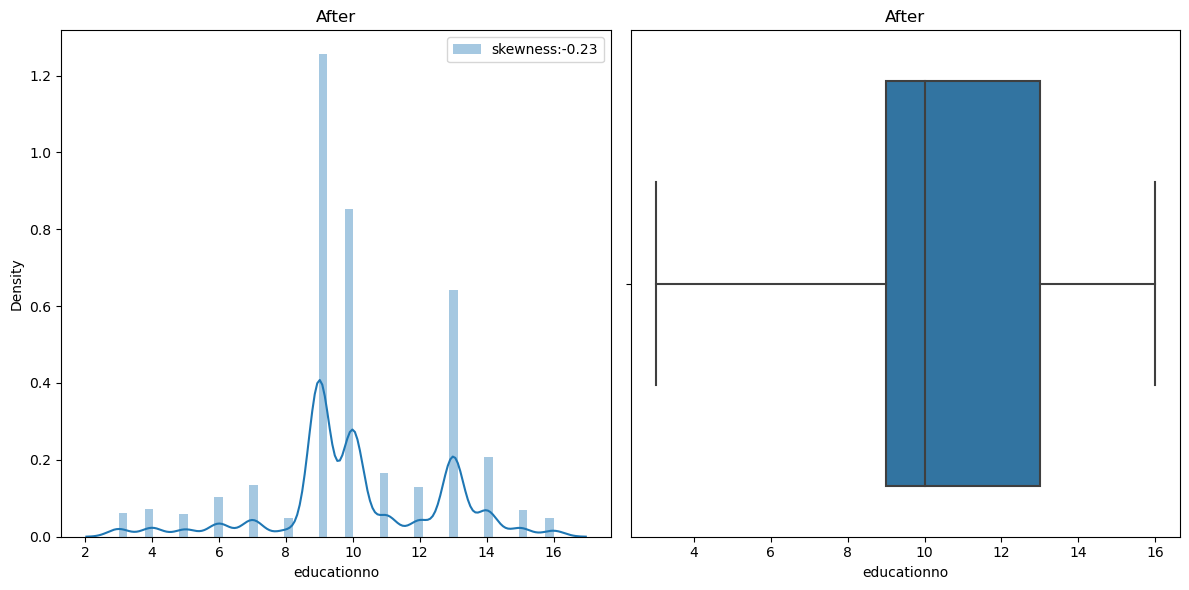

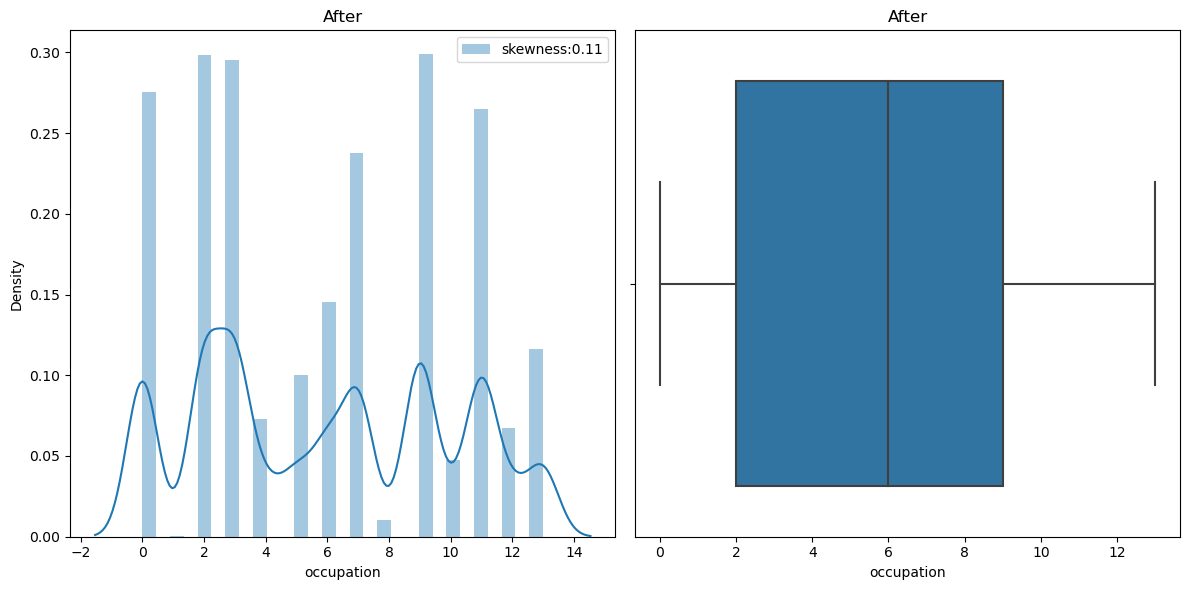

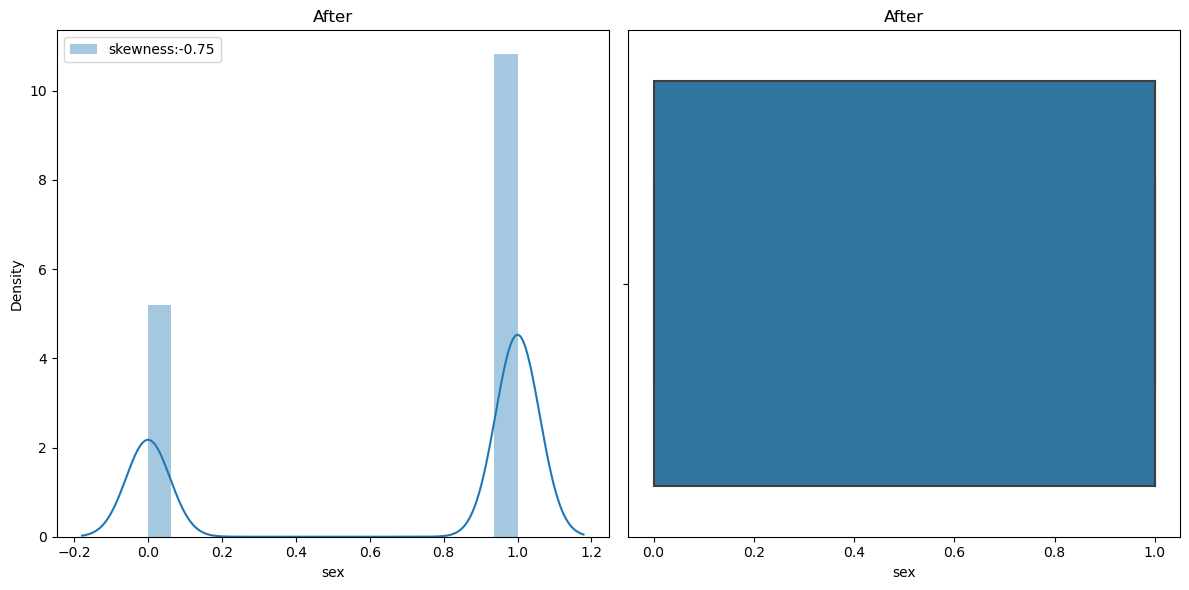

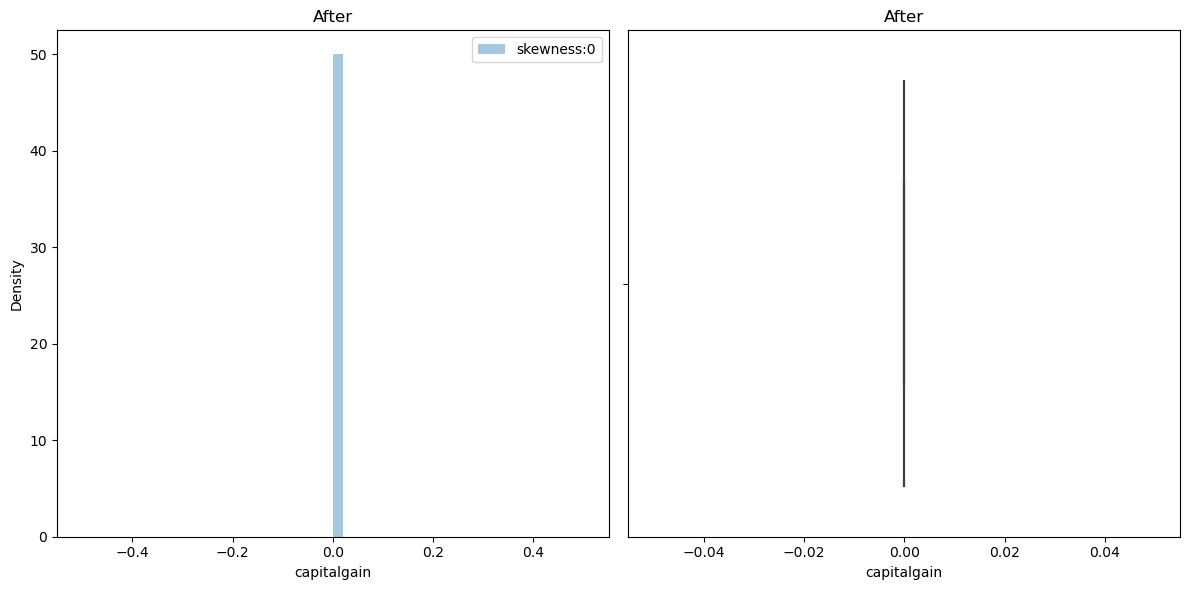

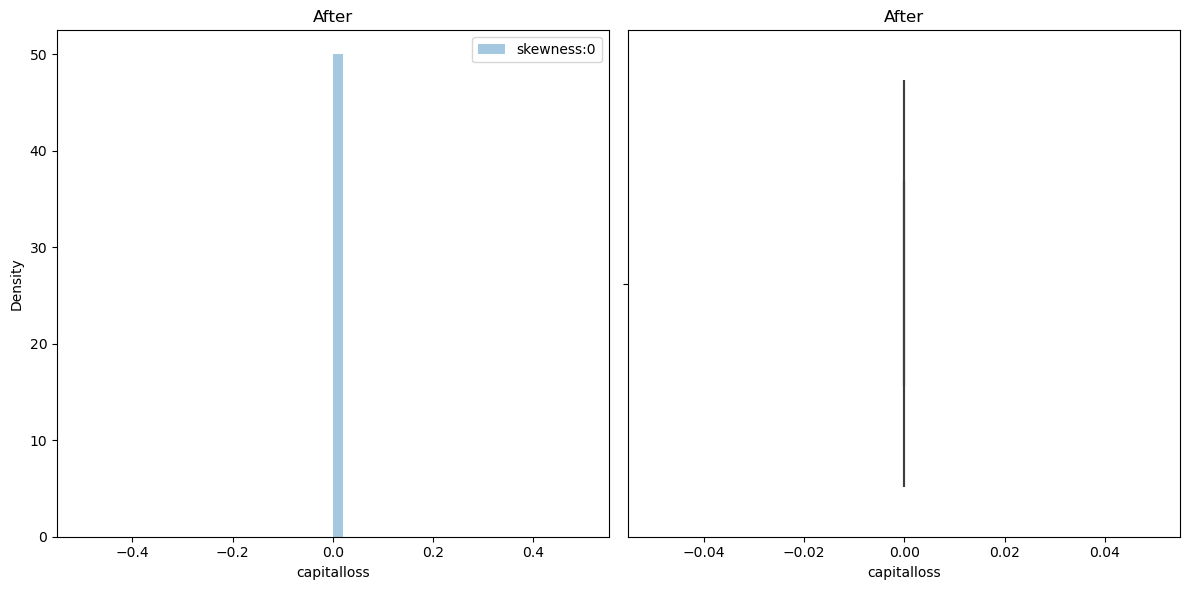

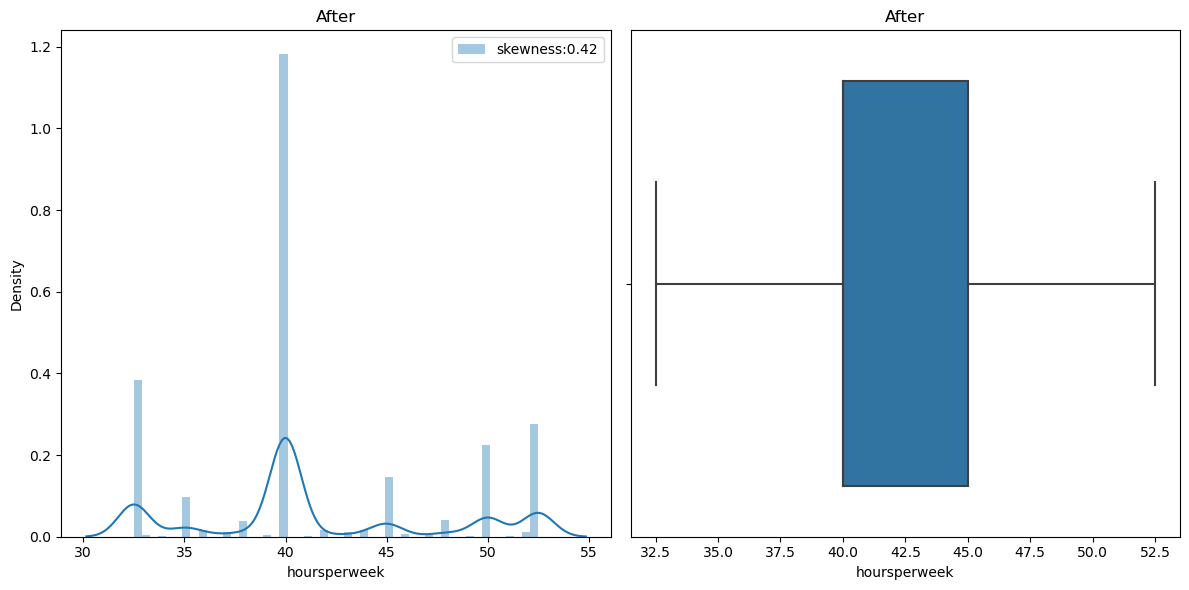

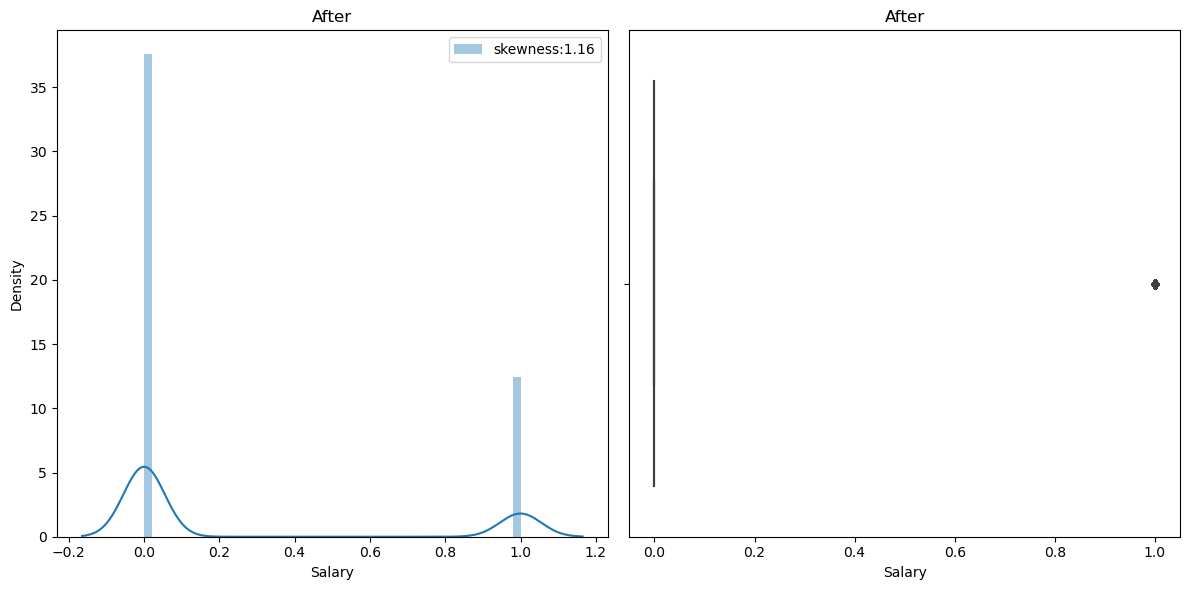

In [24]:
#lets now plot the distribution 
import warnings
warnings.filterwarnings('ignore')
for col in df.columns:
    plt.figure(figsize=(12,6))
    
    plt.subplot(121)
    sns.distplot(df[col],label='skewness:'+ str(np.round(df[col].skew(),2)))
    plt.title('After')
    plt.legend()  
    
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()
    

In [26]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x=StandardScaler().fit_transform(x)

In [27]:
#passing hyperprameters
from sklearn.model_selection import GridSearchCV

clf=SVC()
param=[{'kernel':['linear','rbf'],'gamma':[0.5,0.1],'C':[10,0.1] }]
cls=GridSearchCV(clf,param,cv=5,verbose=200)
cls.fit(x,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START C=10, gamma=0.5, kernel=linear..............................
[CV 1/5; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.795 total time=  49.1s
[CV 2/5; 1/8] START C=10, gamma=0.5, kernel=linear..............................
[CV 2/5; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.797 total time=  48.3s
[CV 3/5; 1/8] START C=10, gamma=0.5, kernel=linear..............................
[CV 3/5; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.799 total time=  49.4s
[CV 4/5; 1/8] START C=10, gamma=0.5, kernel=linear..............................
[CV 4/5; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.802 total time=  49.9s
[CV 5/5; 1/8] START C=10, gamma=0.5, kernel=linear..............................
[CV 5/5; 1/8] END C=10, gamma=0.5, kernel=linear;, score=0.797 total time=  48.4s
[CV 1/5; 2/8] START C=10, gamma=0.5, kernel=rbf.................................
[CV 1/5; 2/8] END ..C=10, gamma=0.5, kernel=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10, 0.1], 'gamma': [0.5, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=200)

In [28]:
cls.best_params_,cls.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8074667467742624)

In [29]:
#model is created based on best parameters
model=SVC(C=10,gamma=0.1,kernel='rbf').fit(x,y)
pred=model.predict(x)
print('training accuracy of the model',accuracy_score(y,pred))

training accuracy of the model 0.805477271973741


In [30]:
test_df=pd.read_csv('SalaryData_Test(1).csv')
test_df['Salary']=LabelEncoder().fit_transform(test_df['Salary'])
test_df['sex']=LabelEncoder().fit_transform(test_df['sex'])
test_df['occupation']=LabelEncoder().fit_transform(test_df['occupation'])
test_df['education']=LabelEncoder().fit_transform(test_df['education'])
test_df['workclass']=LabelEncoder().fit_transform(test_df['workclass'])
test_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,Never-married,6,Own-child,Black,1,0,0,40,United-States,0
1,38,2,11,9,Married-civ-spouse,4,Husband,White,1,0,0,50,United-States,0
2,28,1,7,12,Married-civ-spouse,10,Husband,White,1,0,0,40,United-States,1
3,44,2,15,10,Married-civ-spouse,6,Husband,Black,1,7688,0,40,United-States,1
4,34,2,0,6,Never-married,7,Not-in-family,White,1,0,0,30,United-States,0


In [31]:
x=test_df.iloc[:,[0,1,2,3,5,8,9,10,11]]
y=test_df.iloc[:,13]
x=StandardScaler().fit_transform(x)

In [32]:
#Predicting the test model,from the model which was created using train sets 

predict_test=model.predict(x)
predict_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [33]:
score_of_the_model=accuracy_score(y,predict_test)
print('Testing accuracy of the model',score_of_the_model)

Testing accuracy of the model 0.7851261620185923


In [34]:
# if kernal tric is linear
model=SVC(C=10,gamma=0.5,kernel='linear').fit(x,y)
pred=model.predict(x)
score_of_the_model=accuracy_score(y,predict_test)
print('Testing accuracy of the model',score_of_the_model)


Testing accuracy of the model 0.7851261620185923
